<a href="https://colab.research.google.com/github/Ar0dRz/ListoTestRedes/blob/main/Listomnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/IntroDLCode/blob/master/01_mnist.ipynb)

En primer lugar, descargamos los datos que usaremos para entrenar la red neuronal.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"].values.astype(np.float32), mnist["target"].values.astype(int)

Vamos a visualizar algunos ejemplos de los datos que acabamos de descargar.

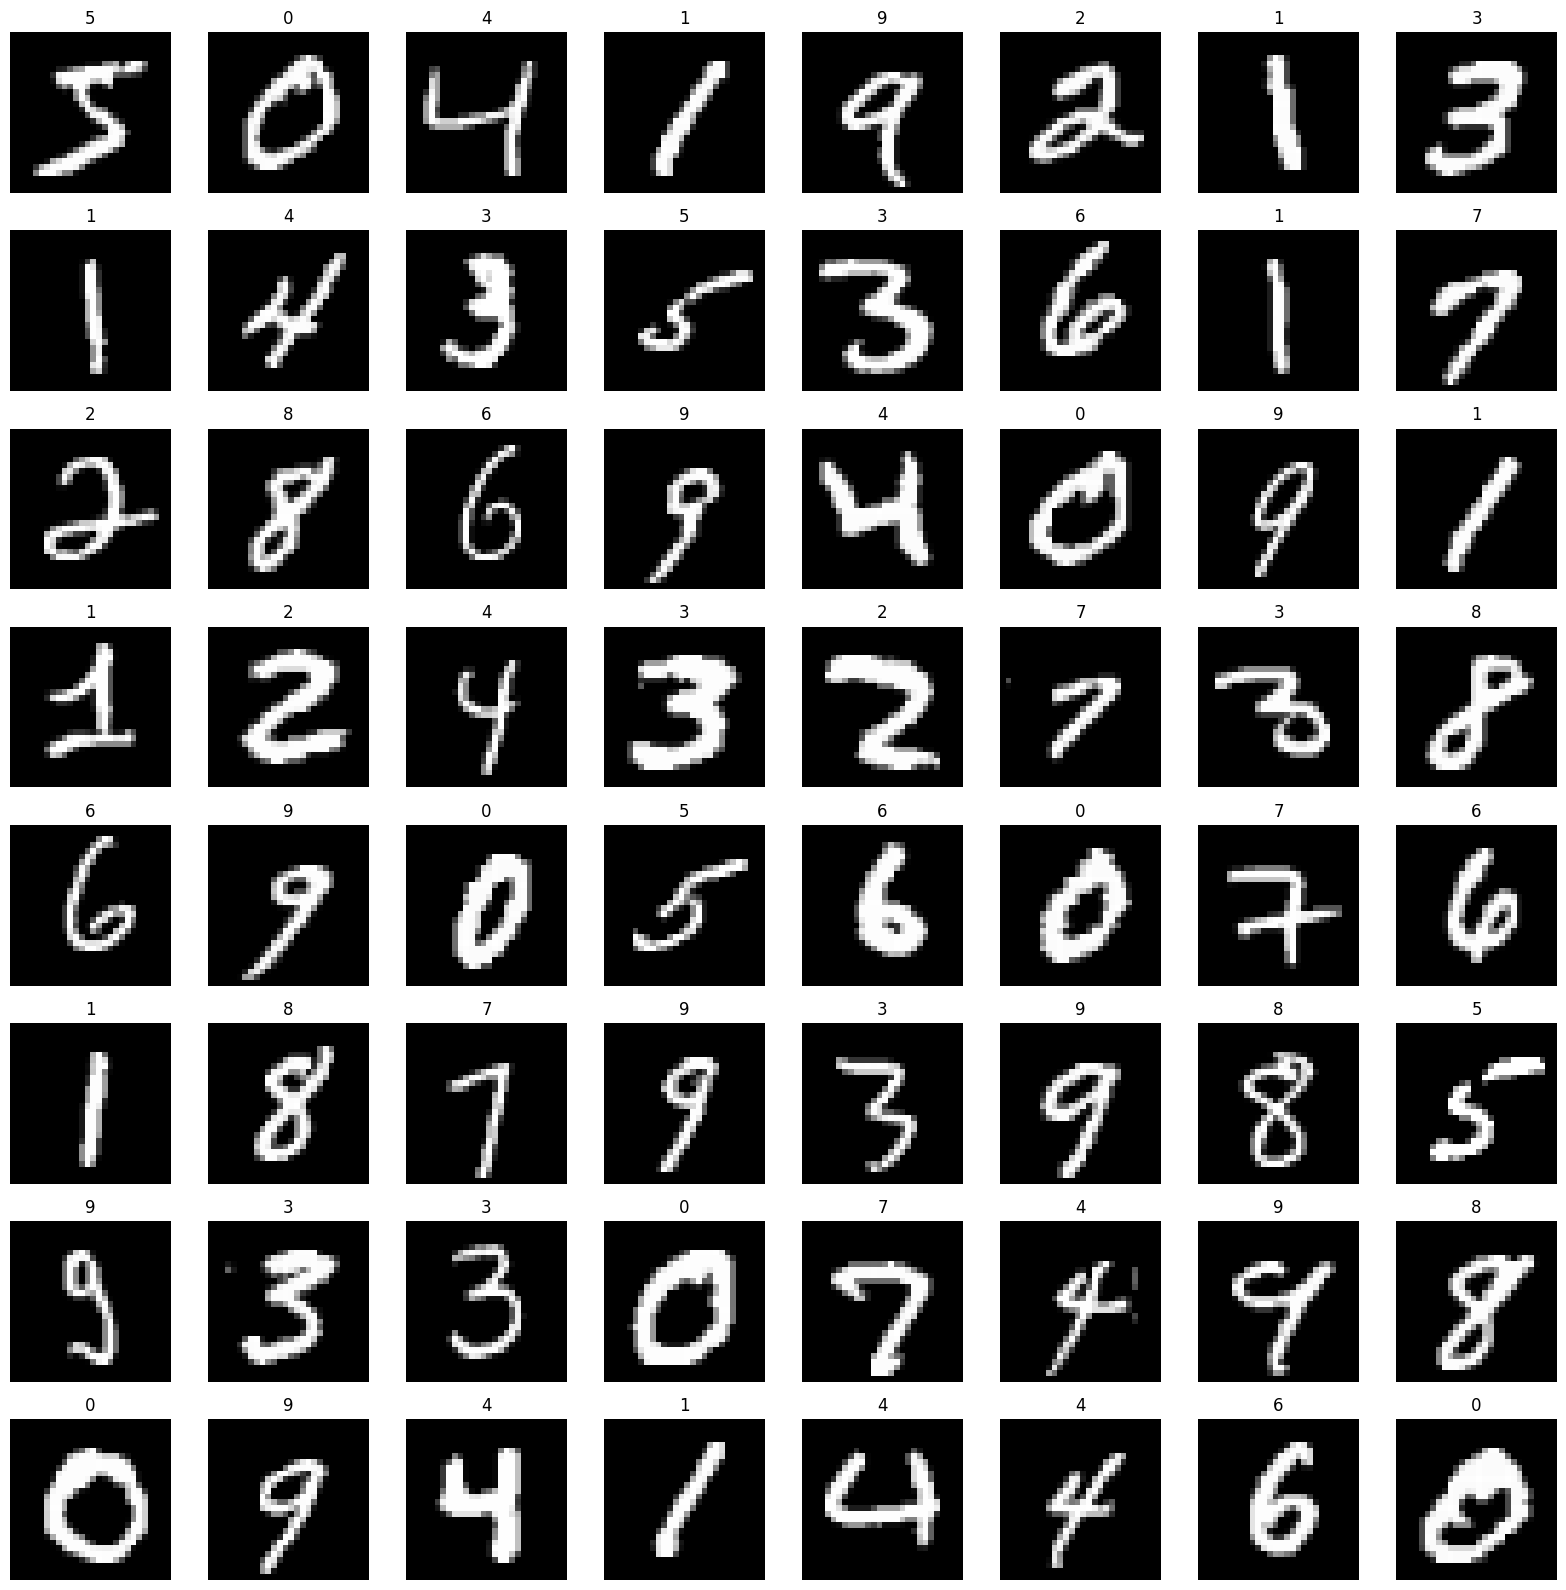

In [2]:
import matplotlib.pyplot as plt

r, c = 8, 8
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        ax.axis("off")
        ax.imshow(X[ix].reshape(28,28), cmap="gray")
        ax.set_title(y[ix])
plt.tight_layout()
plt.show()

Cada imagen tiene asociada su etiqueta, que indica el número que representa, y que es lo que queremos que nuestra red neuronal aprenda a predecir dada una imagen de entrada.

![](https://miro.medium.com/v2/resize:fit:679/0*u5-PcKYVfUE5s2by.gif)

Vamos a usar una red neuronal sencilla, conocida como perceptrón multicapa, que consiste en una serie de capas de neuronas conectadas entre sí. Cada neurona recibe como entrada las salidas de las neuronas de la capa anterior, y produce una salida que es la entrada de las neuronas de la capa siguiente.

In [3]:
from torch.nn import Sequential as S
from torch.nn import Linear as L
from torch.nn import ReLU as R


model = S(L(784,128),R(),L(128,10))
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

Dado un conjunto de imágenes de entrada, la red neuronal produce una salida para cada una de ellas, que es la predicción que hace la red neuronal sobre la etiqueta de la imagen.

In [4]:
import torch

y_hat = model(torch.tensor(X[:10]))
preds = torch.argmax(y_hat, dim=1)

preds

tensor([1, 1, 4, 7, 7, 4, 1, 1, 1, 1])

Como la red aún no está entrenada, las predicciones que hace son aleatorias. El siguiente bloque de código se encarga de entrenar la red.

In [5]:
from tqdm import tqdm

X_train, X_test = torch.from_numpy(X[:60000] / 255.), torch.from_numpy(X[60000:] / 255.)
y_train, y_test = torch.from_numpy(y[:60000]), torch.from_numpy(y[60000:])
bs = 32
num_batches = len(X_train) // bs

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(10):
	for b in tqdm(range(num_batches)):
		x = X_train[b*bs:(b+1)*bs]
		y = y_train[b*bs:(b+1)*bs]
		y_hat = model(x)
		loss = loss_fn(y_hat, y)
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
	print(f"Epoch {epoch+1} loss: {loss.item():.3f}")

100%|██████████| 1875/1875 [00:03<00:00, 477.06it/s]


Epoch 1 loss: 0.050


100%|██████████| 1875/1875 [00:04<00:00, 388.12it/s]


Epoch 2 loss: 0.022


100%|██████████| 1875/1875 [00:04<00:00, 387.74it/s]


Epoch 3 loss: 0.016


100%|██████████| 1875/1875 [00:04<00:00, 418.91it/s]


Epoch 4 loss: 0.013


100%|██████████| 1875/1875 [00:06<00:00, 311.11it/s]


Epoch 5 loss: 0.013


100%|██████████| 1875/1875 [00:04<00:00, 425.15it/s]


Epoch 6 loss: 0.008


100%|██████████| 1875/1875 [00:04<00:00, 386.18it/s]


Epoch 7 loss: 0.009


100%|██████████| 1875/1875 [00:05<00:00, 373.33it/s]


Epoch 8 loss: 0.010


100%|██████████| 1875/1875 [00:04<00:00, 422.09it/s]


Epoch 9 loss: 0.004


100%|██████████| 1875/1875 [00:04<00:00, 375.95it/s]

Epoch 10 loss: 0.002


Una vez entrenada la red, podemos evaluar su rendimiento sobre los datos de test.

In [6]:
acc = 0
with torch.no_grad():
	for b in range(num_batches):
		x = X_test[b*bs:(b+1)*bs]
		y = y_test[b*bs:(b+1)*bs]
		y_hat = model(x)
		acc += torch.sum(torch.argmax(y_hat, dim=1) == y).item()

print(f"Accuracy: {acc} / {len(X_test)}")

Accuracy: 9704 / 10000


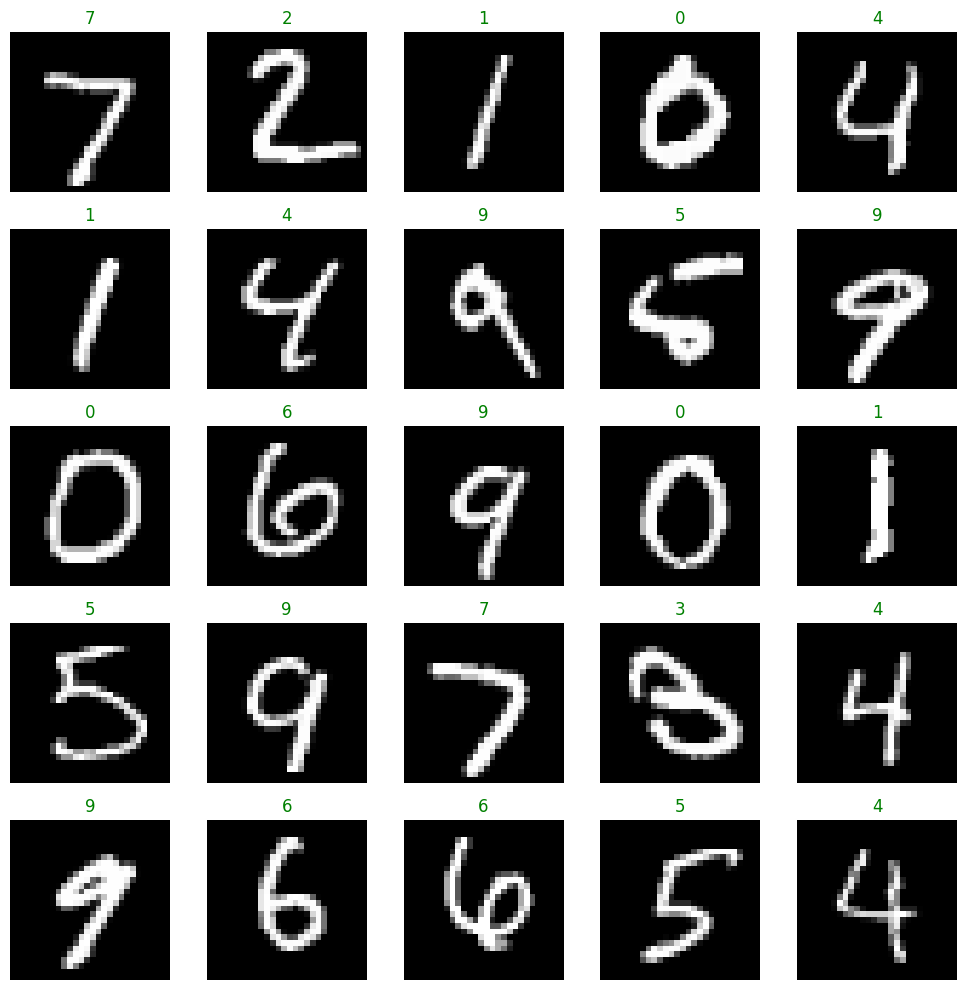

In [7]:
r, c = 5, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        ax.axis("off")
        pred = torch.argmax(model(X_test[ix]).unsqueeze(0)).item()
        ax.imshow(X_test[ix].reshape(28,28), cmap="gray")
        ax.set_title(pred, color="green" if pred == y_test[ix] else "red")
plt.tight_layout()
plt.show()

Nuestra red es capaz de predecir correctamente el 98% de las imágenes de test. primera red neuronal.
